In [87]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [88]:
# Load dataset
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [89]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [90]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [91]:
# Drop columns
df = df.drop(columns=['deck', 'embark_town'])
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alive           0
alone           0
dtype: int64

In [92]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['embarked'])
df = df.dropna(subset=['age'])

from sklearn.impute import KNNImputer

'''imputer = KNNImputer(n_neighbors=5)
df[['age']] = imputer.fit_transform(df[['age']])

#df['age'].fillna(df['age'].mean(), inplace=True)'''
df.isnull().sum()

survived      0
pclass        0
sex           0
age           0
sibsp         0
parch         0
fare          0
embarked      0
class         0
who           0
adult_male    0
alive         0
alone         0
dtype: int64

In [93]:
# Features and target
x = titanic[['age', 'fare']]
y = titanic['survived']

from sklearn.preprocessing import StandardScaler
# Standardize features
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [94]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train random forest
from sklearn.ensemble import RandomForestClassifier
# Initialize and train model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.7094972067039106
Confusion Matrix:
 [[85 20]
 [32 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       105
           1       0.68      0.57      0.62        74

    accuracy                           0.71       179
   macro avg       0.70      0.69      0.69       179
weighted avg       0.71      0.71      0.70       179



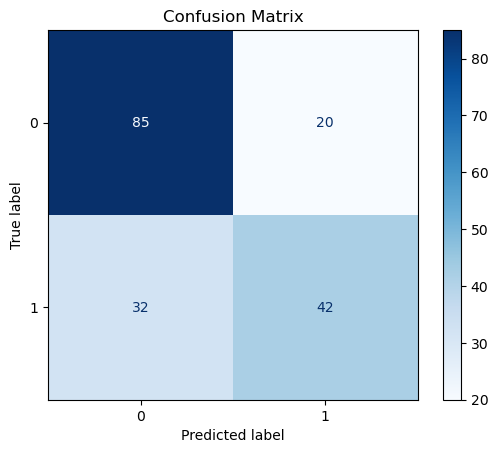

In [97]:
# Predict on test set
y_pred = rf_model.predict(x_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Classification Report:\n", classification_report(y_test, y_pred))

#display confusion matrix
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [98]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, x, y, cv=5)

# Show results
print("Cross-Validation Scores (5 folds):", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores (5 folds): [0.60335196 0.6741573  0.66853933 0.69101124 0.71348315]
Average Accuracy: 0.6701085933086435
